In [2]:
# Physics Problems 1
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.constants   as konst

Modified    By    Reason
--------    --    ------
04-July-23  CBL   Original, solving and writing up problems from Haliday and Resnick 
                  Second printing April 1967

Page 75 of Part 1&2 textbook. Problem number 6. Show that the horizontal range of a projectile of velocity $V_0$ and angle $\theta_0$ is <br> 
$R = ({{V_{0}^2}\over{g}})sin(2\theta_{0})$
<hr> 
Reduce to X-Y problem<br> 
$V_{X}=V_{0}cos(\theta_{0}) $ <br> 
$V_{Y}=V_{0}sin(\theta_{0}) - gt $ where g is the gravitational acceleration <br>
at maximum height $V_0 = 0$ therefore: <br>
$V_{0}sin(\theta_{0}) = gt $ or $t={V_{0}sin(\theta_{0})\over{g}}$ <br> 
The distance traveled by the projectile is given by: <br> 
$R=V_{0}cos(\theta_{0})t $ substituting t (total flight time is 2t) we have: <br>
$R={2{V_{0}^2}cos(\theta_{0}) sin(\theta_{0})\over{g}}$ <br> 
Using the trigonometric identity $sin(2\theta) = 2 sin(\theta)cos(theta)$ we get: <br>
$R = ({{V_{0}^2}\over{g}})sin(2\theta_{0})$

In [3]:
def VelocityAndAngle(V0, theta):
    """
    execute the above problem.
    """
    return np.power(V0,2.0)/konst.g * np.sin(2*theta)

In [30]:
class Trajectory:
    def __init__(self,VX,VZ):
        """
        Initialize the trajectory class using initial VX and VY
        assume meters per second in. Also assume in a gravitational field. 
        """
        self.VX = VX
        self.VZ = VZ
        self.Reset()
       
    def Reset(self):
        self.t0 = 0
        self.X0 = 0
        self.Z0 = 0
         
    def XZFromTime(self,t):
        """
        return X,Y values in meters given t. 
        """
        dt = t-self.t0
        X = self.X0 + self.VX*dt
        Z = self.Z0 + self.VZ*dt - 0.5*konst.g*np.power(dt,2.0)
        self.VZ = self.VZ - konst.g*dt
        self.X0 = X
        self.Z0 = Z
        self.t0 = t
        return X,Z

Text(0.5, 0, 'Radial Distance(m)')

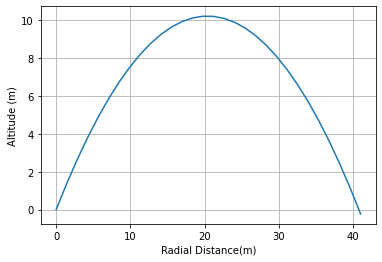

In [38]:
# Make a plot
t = np.arange(0,3.0,.1)
V0 = 20.0 # meters per second
angle = np.deg2rad(45.0)
XZStep = Trajectory(V0*np.cos(angle),V0*np.sin(angle))
X,Z = XZStep.XZFromTime(t)
plt.plot(X,Z)
plt.grid()
plt.ylabel("Altitude (m)")
plt.xlabel("Radial Distance(m)")

Problem 13, page 75 <br> 
Cathode ray tube, an electron beam of 1.0e9 cm/s passes through horizontal plates 2cm long with a downward force of 1.0e17cm/s^2, <br> 
<ol>
    <li> what is the vertial displacement after exiting the 2 cm plates? </li>
    <li> what is Vx and Vy as it exits the plate assembly? </li>
</ol> 
<hr>

In [56]:
V0_X = 1.0e9  # cm/s
V0_Y = 0.0    # cm/s
Plate_Length = 2.0 # cm
A_Y  = 1.0e17 #cm/s^2
# determine the length of time in the field. V0_X should remain unchanged. 
dt = Plate_Length/V0_X
print("dt: ", dt)
VY = V0_Y - A_Y * dt
Y  = 0.5 * A_Y * np.power(dt,2.0)
print("Y Velocity is: ", f"{VY:.3}  Displacement in Y is: ", Y)

dt:  2e-09
Y Velocity is:  -2e+08  Displacement in Y is:  0.2
